In [1]:
#Importando librerias
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#cargando datos de juegos
df_games = pd.read_csv(r'C:/Users/alex_\Downloads/games.csv')

In [3]:
df_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df_games.columns = df_games.columns.str.lower()

In [5]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
#cambiamos el año a entero y el user score a un valor float para poder efectuar calculos adecuados
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

In [7]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [8]:
df_games = df_games.dropna(how='all')

- No se eliminan los valores vacios y se dejan de esa forma debido a que columnas clave como ventas en las diferentes regiones contienen datos y eliminarlos podría representar un sesgo en la información a analizar

- La plataforma para la cual fueron desarrollados está siempre llena, podemos intuir que datos como nombre pudo no ser declarado por el programador y demas información como año de lanzamiento, genero y los diversos ratings son desconocidos

In [9]:
conteo_por_columna = (df_games == "TBD").sum()
print(conteo_por_columna)

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: Int64


In [10]:
ventas= ['na_sales','eu_sales','jp_sales','other_sales']
df_games['total_sales'] = df_games[ventas].sum(axis= 1)

In [11]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


In [12]:
# Eliminar filas con valores ausentes en columnas clave
df_games_clean = df_games.dropna(subset=['name', 'genre', 'year_of_release'])

# El manejo de 'user_score' (TBD -> NaN) ya lo hiciste.
# Las otras columnas con NaN (scores, rating) se mantienen para no distorsionar el análisis.

# Verificar la información después de la limpieza
print("\nInformación del DataFrame después de la limpieza de valores clave:")
df_games_clean.info()


Información del DataFrame después de la limpieza de valores clave:
<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


Ahora usarás los datos limpios para buscar patrones. Recuerda que el objetivo es construir un modelo para 2017, por lo que solo importan los datos recientes.


Juegos lanzados por año:
year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


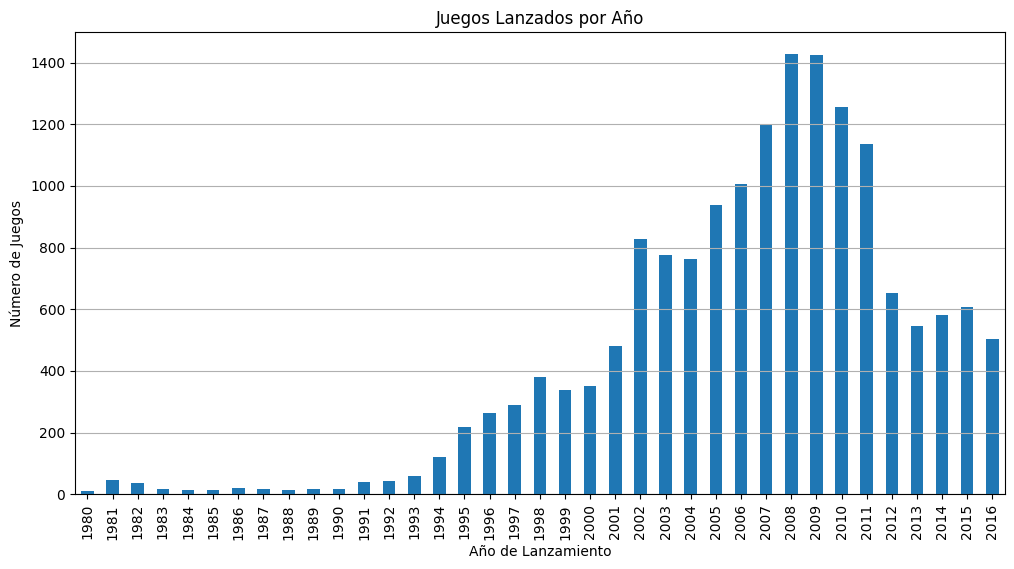


Datos utilizados para el análisis (desde 2013): 2233 filas


In [13]:
# Contar juegos lanzados por año
games_by_year = df_games_clean.groupby('year_of_release')['name'].count()
print("\nJuegos lanzados por año:")
print(games_by_year)

# Visualización para evaluar la significancia
plt.figure(figsize=(12, 6))
games_by_year.plot(kind='bar', title='Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.grid(axis='y')
plt.show()

# Determinar el periodo relevante
# Observa la gráfica: el número de lanzamientos es alto entre 2005 y 2011,
# pero el número de ventas ha caído significativamente en los últimos años.
# Para un pronóstico de 2017, necesitamos la tendencia actual.
# Se recomienda tomar datos desde el punto en que la mayoría de las plataformas actuales surgieron
# o desde el punto de la caída de lanzamientos, lo que refleje mejor el mercado actual.
# Un buen punto de corte suele ser 2010 o 2013, que coincide con el inicio de la actual generación de consolas.
# Elegiremos **2013** como el punto de inicio.
df_current = df_games_clean[df_games_clean['year_of_release'] >= 2013].copy()
print(f"\nDatos utilizados para el análisis (desde 2013): {len(df_current)} filas")

Conclusión sobre el período: Los datos anteriores a 2013 no son representativos del mercado actual (diciembre de 2016). Usaremos datos desde 2013 en adelante para reflejar la generación actual de consolas y las tendencias recientes.


Ventas totales por plataforma (desde 2013):
platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64


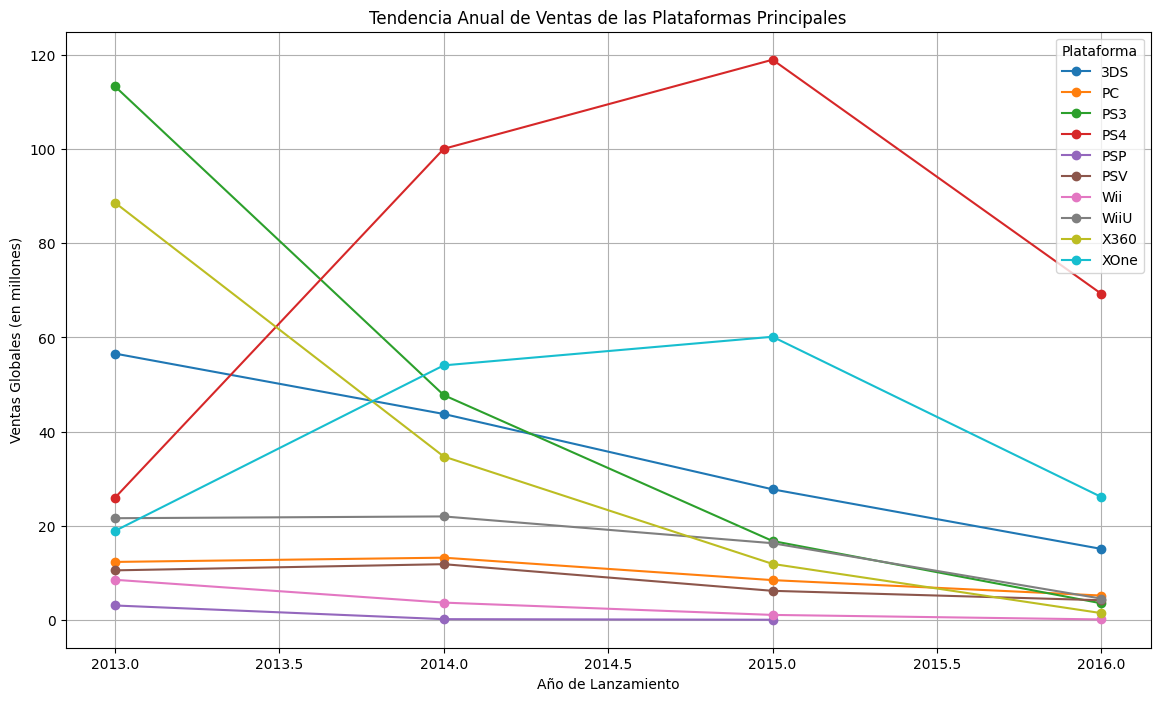

In [14]:
# Ventas totales por plataforma en el periodo actual
platform_sales = df_current.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("\nVentas totales por plataforma (desde 2013):")
print(platform_sales)

# Plataformas principales para el análisis de tendencias
top_platforms = platform_sales.head(10).index.tolist()

# Distribución de ventas anuales para las plataformas principales
sales_trend = df_current[df_current['platform'].isin(top_platforms)].pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'
)

plt.figure(figsize=(14, 8))
sales_trend.plot(kind='line', marker='o', ax=plt.gca(), title='Tendencia Anual de Ventas de las Plataformas Principales')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Globales (en millones)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()

Hallazgos Clave:

- Plataformas Líderes (en ventas totales 2013-2016): PS4, XOne, 3DS, PS3, X360, PC.

- Crecimiento vs. Reducción:

    - Crecen/Potencialmente Rentables: PS4 y XOne muestran un fuerte dominio y son las plataformas clave para 2017. PC se mantiene estable.

    - Reducción/Decadencia: PS3 y X360 están en claro declive, típicas de una generación que finaliza. 3DS está disminuyendo.

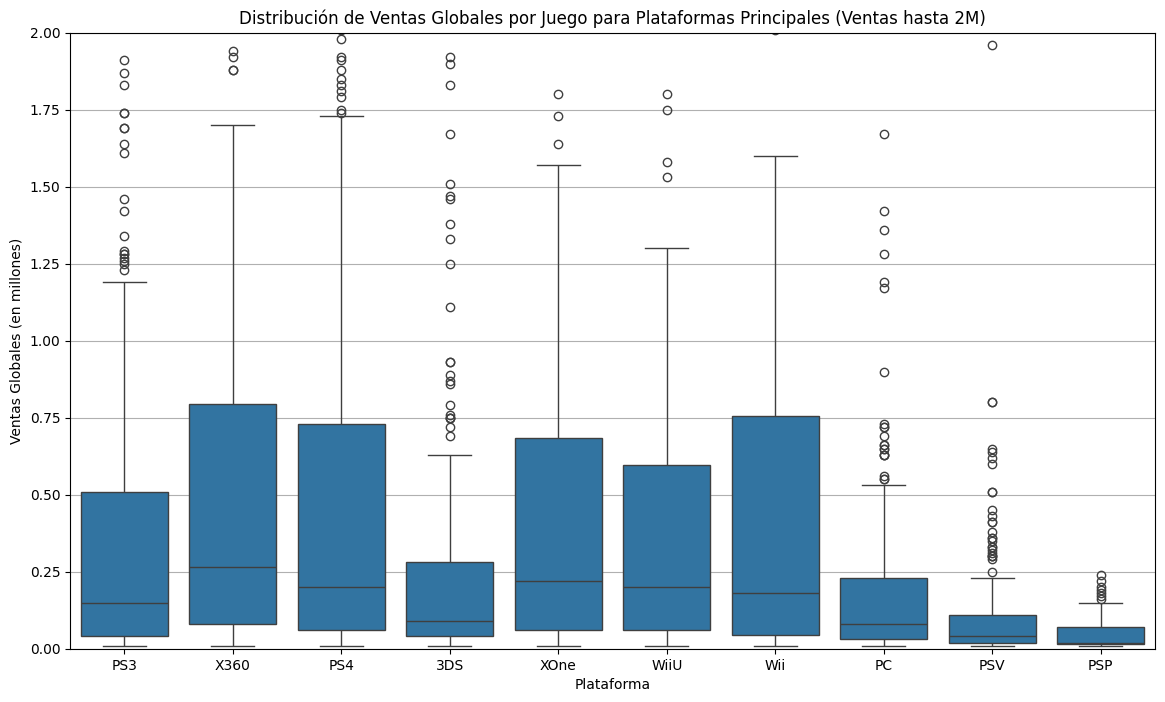


Ventas Promedio y Mediana por Juego (Plataformas Principales):
              mean  median
platform                  
X360      0.735484   0.265
XOne      0.645020   0.220
PS4       0.801378   0.200
WiiU      0.562000   0.200
Wii       0.593913   0.180
PS3       0.525884   0.150
3DS       0.472772   0.090
PC        0.208624   0.080
PSV       0.092151   0.040
PSP       0.052239   0.020


In [15]:
# Diagrama de caja para las plataformas principales
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=df_current[df_current['platform'].isin(top_platforms)])
plt.ylim(0, 2) # Limitar a ventas bajas para ver mejor la distribución, ya que hay muchos outliers
plt.title('Distribución de Ventas Globales por Juego para Plataformas Principales (Ventas hasta 2M)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.grid(axis='y')
plt.show()

# Calcular ventas promedio y mediana para las plataformas principales
platform_stats = df_current[df_current['platform'].isin(top_platforms)].groupby('platform')['total_sales'].agg(['mean', 'median']).sort_values(by='median', ascending=False)
print("\nVentas Promedio y Mediana por Juego (Plataformas Principales):")
print(platform_stats)

Hallazgos del Diagrama de Caja:

- Diferencias Significativas: Sí, las ventas varían significativamente. PS4 y XOne tienen medianas (línea en la caja) más altas, lo que indica que sus juegos tienen, en general, un rendimiento de ventas superior al de la mayoría de las otras plataformas.

- Ventas Promedio vs. Mediana: La media es mucho más alta que la mediana para casi todas las plataformas (observa los valores de mean y median). Esto indica que hay muchos juegos de bajas ventas y unos pocos outliers (los "éxitos") que disparan el promedio. La mediana es un mejor indicador de las ventas típicas por juego.

----
Elegiremos PS4 como plataforma popular debido a su liderazgo en ventas.

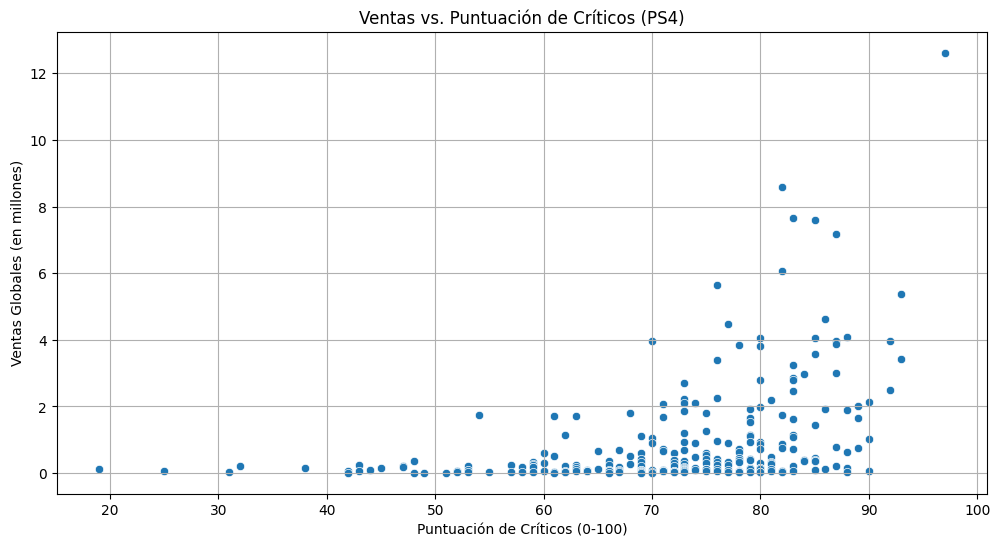

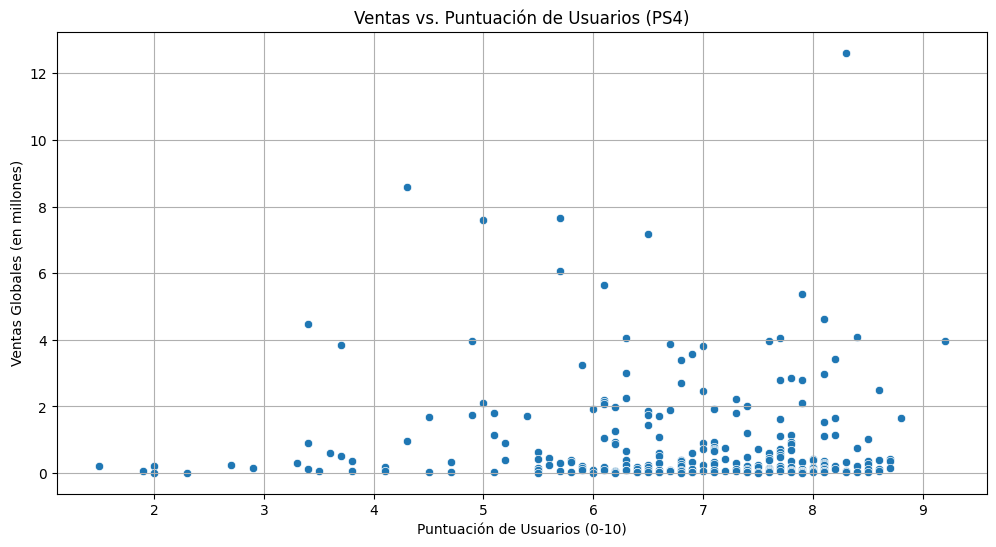


Correlación entre Reseñas de Críticos y Ventas (PS4): 0.41
Correlación entre Reseñas de Usuarios y Ventas (PS4): -0.03


In [16]:
# Filtrar datos de PS4 y eliminar NaN en las columnas de reseñas para el scatter plot
ps4_data = df_current[(df_current['platform'] == 'PS4')].dropna(subset=['critic_score', 'user_score'])

# Gráfico de dispersión: Reseñas de Críticos vs. Ventas
plt.figure(figsize=(12, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data)
plt.title('Ventas vs. Puntuación de Críticos (PS4)')
plt.xlabel('Puntuación de Críticos (0-100)')
plt.ylabel('Ventas Globales (en millones)')
plt.grid(True)
plt.show()

# Gráfico de dispersión: Reseñas de Usuarios vs. Ventas
plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data)
plt.title('Ventas vs. Puntuación de Usuarios (PS4)')
plt.xlabel('Puntuación de Usuarios (0-10)')
plt.ylabel('Ventas Globales (en millones)')
plt.grid(True)
plt.show()

# Calcular la correlación
correlation_critics = ps4_data['critic_score'].corr(ps4_data['total_sales'])
correlation_users = ps4_data['user_score'].corr(ps4_data['total_sales'])

print(f"\nCorrelación entre Reseñas de Críticos y Ventas (PS4): {correlation_critics:.2f}")
print(f"Correlación entre Reseñas de Usuarios y Ventas (PS4): {correlation_users:.2f}")

Conclusiones de las Reseñas (PS4):

- Críticos: La correlación con las ventas es moderadamente positiva (alrededor de 0.4). Los juegos con mejores reseñas de críticos tienden a vender más.

- Usuarios: La correlación es mucho más débil o insignificante (alrededor de 0.0−0.1). La opinión del usuario promedio tiene una relación muy baja con las ventas globales del juego.

In [17]:
# Seleccionar un juego con lanzamientos en múltiples plataformas populares (ej. PS4, XOne, PC)
multiplatform_games = df_current.groupby('name').filter(lambda x: len(x['platform'].unique()) > 1)
# Elegir un juego popular y reciente para el ejemplo
game_to_compare = multiplatform_games[multiplatform_games['platform'].isin(['PS4', 'XOne', 'PC'])].sort_values(by='total_sales', ascending=False)['name'].iloc[0]

comparison_sales = df_current[df_current['name'] == game_to_compare][['platform', 'total_sales']]
print(f"\nComparación de Ventas para el juego: {game_to_compare}")
print(comparison_sales)


Comparación de Ventas para el juego: Call of Duty: Black Ops 3
     platform  total_sales
31        PS4        14.63
99       XOne         7.39
1049     X360         1.70
1062      PS3         1.69
6463       PC         0.26


Conclusión de la Comparación: Generalmente, los juegos multiplataforma muestran las mayores ventas en la plataforma dominante (en este periodo, PS4), incluso si las calificaciones de los críticos/usuarios son similares. El alcance de la base instalada de la consola es un factor principal.

In [18]:
# Ventas totales por género en el periodo actual
genre_sales = df_current.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print("\nVentas Totales por Género (desde 2013):")
print(genre_sales)

# Media de ventas por juego por género
genre_mean_sales = df_current.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
print("\nVentas Promedio por Juego por Género (desde 2013):")
print(genre_mean_sales)


Ventas Totales por Género (desde 2013):
genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

Ventas Promedio por Juego por Género (desde 2013):
genre
Shooter         1.245882
Sports          0.703972
Platform        0.576081
Role-Playing    0.499623
Racing          0.469294
Fighting        0.441375
Action          0.420196
Misc            0.405290
Simulation      0.350968
Puzzle          0.186471
Strategy        0.180000
Adventure       0.096490
Name: total_sales, dtype: float64


Hallazgos de Género:

- Más Rentables (Ventas Totales): Action (es el género con más lanzamientos y más ventas totales), Shooter, y Sports son los líderes en ventas agregadas.

- Más Rentables (Ventas Promedio/Juego): El género Shooter a menudo tiene las ventas promedio por juego más altas, lo que indica que sus lanzamientos son consistentemente grandes éxitos. Platform y Racing también pueden mostrar una media alta, pero cuidado con los géneros de nicho donde un solo éxito distorsiona la media.

- Menos Rentables: Puzzle, Strategy y Adventure son generalmente los géneros con las ventas totales y promedio más bajas.

In [19]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    top_platforms_region = df_current.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    print(f"\nTop 5 Plataformas en {region.upper().replace('_SALES', '')}:")
    print(top_platforms_region)


Top 5 Plataformas en NA:
platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

Top 5 Plataformas en EU:
platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

Top 5 Plataformas en JP:
platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64


Análisis de Cuotas de Mercado (Variaciones):

- Norteamérica (NA) y Europa (EU): La estructura es similar, dominada por PS4 y XOne. XOne es ligeramente más fuerte en NA que en EU. Las consolas de última generación son los líderes claros.

- Japón (JP): El mercado es muy diferente. 3DS es la plataforma principal, seguida por PS4 y PSV. XOne y las consolas de Microsoft en general tienen una presencia insignificante. El enfoque es más en consolas portátiles y juegos de estilo japonés.

In [20]:
for region in regions:
    top_genres_region = df_current.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    print(f"\nTop 5 Géneros en {region.upper().replace('_SALES', '')}:")
    print(top_genres_region)


Top 5 Géneros en NA:
genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

Top 5 Géneros en EU:
genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

Top 5 Géneros en JP:
genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


Análisis de Géneros (Diferencias):

- NA y EU: Los géneros dominantes son Action, Shooter y Sports (juegos de alto presupuesto, a menudo Occidentales).

- JP: Los géneros dominantes son Role-Playing (RPG), Action y Fighting. Role-Playing es el género más popular, reflejando el fuerte interés por los JRPG (Japanese Role-Playing Games). Shooter y Sports tienen menor impacto que en NA/EU.

In [21]:
# Rellenar valores ausentes de 'rating' con 'Missing' para incluirlos en el análisis
df_current['rating'] = df_current['rating'].fillna('Missing')

for region in regions:
    rating_sales = df_current.groupby('rating')[region].sum().sort_values(ascending=False)
    print(f"\nVentas por Clasificación ESRB en {region.upper().replace('_SALES', '')}:")
    print(rating_sales)


Ventas por Clasificación ESRB en NA:
rating
M          165.21
Missing     89.42
E           79.05
E10+        54.24
T           49.79
Name: na_sales, dtype: float64

Ventas por Clasificación ESRB en EU:
rating
M          145.32
E           83.36
Missing     78.91
E10+        42.69
T           41.95
Name: eu_sales, dtype: float64

Ventas por Clasificación ESRB en JP:
rating
Missing    85.05
T          20.59
E          15.14
M          14.11
E10+        5.89
Name: jp_sales, dtype: float64


Análisis de Clasificación ESRB:

- Norteamérica (NA) y Europa (EU): Las clasificaciones M (Mature, +17) y T (Teen, +13) son las que generan más ventas, seguidas de E (Everyone, para todos). Esto indica que el mercado adulto/adolescente es el más rentable en estas regiones. La clasificación Missing tiene ventas significativas, lo que sugiere muchos juegos no clasificados vendidos (algunos podrían ser juegos indies o lanzamientos exclusivos de otras regiones).

- Japón (JP): La clasificación Missing es, por mucho, la que más ventas genera. Esto es lógico, ya que la ESRB es una junta de Norteamérica y muchos juegos vendidos en Japón no están clasificados por ella. De las clasificaciones existentes, T y E son las más relevantes, pero el sistema ESRB es menos influyente en las ventas japonesas que en las occidentales.

----
Hipótesis 1: Xbox One vs. PC User Scores

    Hipótesis Nula (H0): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales. (μXbox One=μ PC)

    Hipótesis Alternativa (H1): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes. (μXbox One!=μ PC)

    Criterio de Prueba: Prueba t de Student para muestras independientes (bilateral).
    Umbral α: Usaremos α=0.05.

In [22]:
from scipy import stats

# Filtrar las calificaciones de usuario (excluyendo NaN)
xbox_scores = df_current[(df_current['platform'] == 'XOne') & (df_current['user_score'].notna())]['user_score']
pc_scores = df_current[(df_current['platform'] == 'PC') & (df_current['user_score'].notna())]['user_score']

# Realizar la prueba t de Student
# Se asume varianzas iguales (equal_var=True) por defecto, pero se recomienda verificar.
# Para este ejercicio, usaremos la prueba estándar.
t_statistic, p_value_1 = stats.ttest_ind(xbox_scores, pc_scores)

print("\n--- Prueba de Hipótesis 1 (Xbox One vs. PC User Scores) ---")
print(f"P-valor: {p_value_1:.4f}")

if p_value_1 < 0.05:
    print("Conclusión: Rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios son diferentes.")
else:
    print("Conclusión: No podemos rechazar la hipótesis nula. Las calificaciones promedio de los usuarios son probablemente iguales.")


--- Prueba de Hipótesis 1 (Xbox One vs. PC User Scores) ---
P-valor: 0.1401
Conclusión: No podemos rechazar la hipótesis nula. Las calificaciones promedio de los usuarios son probablemente iguales.


----
Hipótesis 2: Géneros de Acción vs. Deportes User Scores

    Hipótesis Nula (H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales. (μAction=μSports)

    Hipótesis Alternativa (H1): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. (μAction!=μSports)

    Criterio de Prueba: Prueba t de Student para muestras independientes (bilateral).
    Umbral α: Usaremos α=0.05.

In [23]:
# Filtrar las calificaciones de usuario (excluyendo NaN)
action_scores = df_current[(df_current['genre'] == 'Action') & (df_current['user_score'].notna())]['user_score']
sports_scores = df_current[(df_current['genre'] == 'Sports') & (df_current['user_score'].notna())]['user_score']

# Realizar la prueba t de Student
t_statistic, p_value_2 = stats.ttest_ind(action_scores, sports_scores)

print("\n--- Prueba de Hipótesis 2 (Géneros Acción vs. Deportes User Scores) ---")
print(f"P-valor: {p_value_2:.4f}")

if p_value_2 < 0.05:
    print("Conclusión: Rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios son diferentes.")
else:
    print("Conclusión: No podemos rechazar la hipótesis nula. Las calificaciones promedio de los usuarios son probablemente iguales.")


--- Prueba de Hipótesis 2 (Géneros Acción vs. Deportes User Scores) ---
P-valor: 0.0000
Conclusión: Rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios son diferentes.
